# Step wedge

## Load some modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

import importlib
import sys

sys.path.append('../git/scripts/python/')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bb

In [44]:
dc = rd.readImages('ETH/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

In [45]:
dc.shape

(1201, 1201)

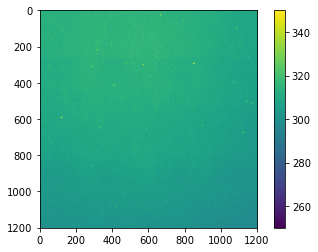

In [46]:
plt.imshow(dc,vmin=250,vmax=350)
plt.colorbar()

In [47]:
ob = rd.readImages('ETH/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

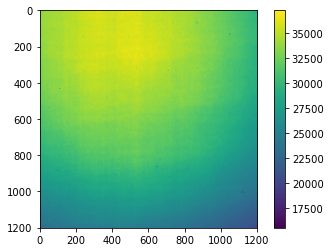

In [48]:
plt.imshow(ob)
plt.colorbar()

In [49]:
water = rd.readImages('ETH/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

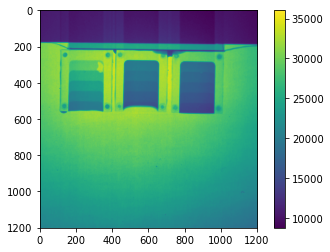

In [50]:
plt.imshow(water)
plt.colorbar()

### Normalize (Beer Lambert)

$$p=-log(\frac{I-I_{dc}}{I_{ob}-I_{dc}})$$

In [51]:
ob = ob -dc
ob[ob<1]=1
ob= ob[::-1]

water = water -dc
water[water<1]=1
water = water[::-1]

Measure the intensity 'dose' in the open beam and water image. Use this as scaling in the normalization.

In [61]:
d0=ob[10:50,10:50].mean()
d=water[10:50,10:50].mean()

In [61]:
p = -np.log(d0/d*(water)/(ob))

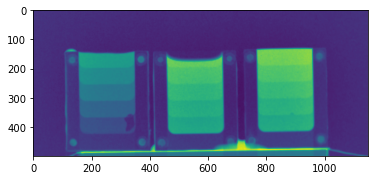

In [62]:
plt.imshow(p[500:1000,0:1150])

In [63]:
p=p[500:1000,0:1150]

## Look at the profile plots

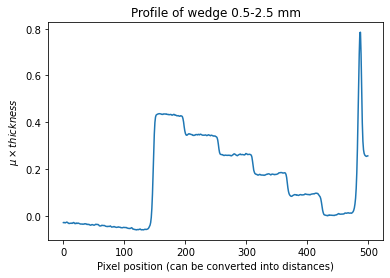

In [68]:
plt.plot(p[:,200:250].mean(axis=1))
plt.title('Profile of wedge 0.5-2.5 mm')
plt.xlabel('Pixel position (can be converted into distances)')
plt.ylabel(r'$\mu\times thickness$');

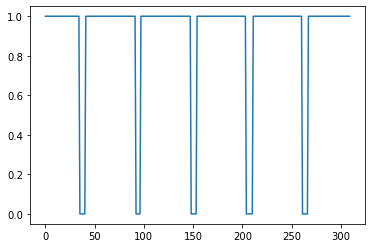

In [79]:
p1=p[:,200:250].mean(axis=1)

dp1 = p1[:-1]-p1[1:]

plt.plot(dp1[160:470]<0.005)

mask =dp1<0.005

In [83]:
from skimage.measure import label

l=label(mask)

p10=p1[1:]
np.mean(p10[l==0])

0.23835943321772193

### Task
To measure the attenuation coefficien from the images. Compare when container images are used as OB images instead of the one without anything.

## Black body correction
Scattered neutrons introduce a bias in the values. This can be corrected using black body images.